# TFM 16ª Ed Máster Data Science Madrid Kschool
# Predicción de MVP de la NBA temporada 2019

## Introducción
En este TFM prentendemos, mediante la aplicación de Modelos estadísticos de Machine Learning supervisado intentar predecir qué jugador de la NBA será MVP para la actual temporada.

### Descripción de datos sin procesar: 
Los datos que vamos a necesitar serán:
    * Estadísticas individuales por jugador
    * Estadísticas y votos de los ganadores MVP de temporadas anteriores
    Todos los datos los encontramos en www.basketball-reference.com
    
### Metodología: 
Utilizaremos Supervised Learning por lo que necesitaremos datos de entrenamiento etiquetado formado por parejas de vectores etiquetados.

En el vector Input (X) contendrá las estadísticas de los jugadores finalistas y ganadores de las temporadas anteriores.

En el vector Output (Y), la puntuacion asignada como premio (share_awards)

El resultado de la relacion será una Regresión, pues el dato que esperamos es un número, no una clasificación del dato.

#### Tipos de modelos
Regression: 
* Linear Regression 
* k neighbor Regressor 
* Decision Tree 
 
#### Metricas
Regression: 
* RMSE 
* MAE and MAPE 
* Correlation and Bias

#### Herramientas
Jupyter Notebook

Python
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Scikit Learn
    

  
### Resumen de resultados principales 
○ Los resultados detallados estarán disponibles ejecutando el código en el repositorio 
### Conclusiones 
○ No es un resumen del trabajo. El problema era relevante, ahora con su trabajo, ¿qué puede decir acerca de cómo se resuelve el problema? 


# Load, clean and study data

Voting
* First -- First Place Votes
* Totals
* G -- Games

Per Game
* MP -- Minutes Played Per Game
* PTS -- Points Per Game
* TRB -- Total Rebounds Per Game
* AST -- Assists Per Game
* STL -- Steals Per Game
* BLK -- Blocks Per Game

Shooting
* FG% -- Field Goal Percentage
* 3P% -- 3-Point Field Goal Percentage
* FT% -- Free Throw Percentage

Advanced
* WS -- Win Shares, An estimate of the number of wins contributed by a player.
* WS/48 -- Win Shares Per 48 Minutes, An estimate of the number of wins contributed by a player per 48 minutes (league average is approximately .100)

In [2]:
import pandas as pd

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# read the winner players other season that it will use for training model
mvp_win_train = pd.read_csv('Data/MVP Winners.csv', sep=';',header=0)

In [5]:
#Refill datas NAN to 0
mvp_win_train.fillna(0, inplace=True) 

In [6]:
# Drop data with NaN
mvp_win_train.dropna()

,season,player,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
0,1980-81,Julius Erving,0.756098,28.0,454.0,690.0,0.658,82.0,35.0,24.6,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231
1,1980-81,Larry Bird,0.756098,20.0,423.0,690.0,0.613,82.0,39.5,21.2,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160
2,1980-81,Kareem Abdul-Jabbar,0.658537,8.0,286.0,690.0,0.414,80.0,37.2,26.2,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230
3,1980-81,Moses Malone,0.487805,8.0,180.0,690.0,0.261,80.0,40.6,27.8,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202
4,1980-81,George Gervin,0.634146,1.0,83.0,690.0,0.120,82.0,33.7,27.1,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182
5,1980-81,Marques Johnson,0.731707,1.0,73.0,690.0,0.106,76.0,33.4,20.3,6.8,4.6,1.5,0.5,0.552,0.000,0.706,11.2,0.211
6,1980-81,Robert Parish,0.756098,0.0,53.0,690.0,0.077,82.0,28.0,18.9,9.5,1.8,1.0,2.6,0.545,0.000,0.710,10.9,0.228
7,1980-81,Dennis Johnson,0.695122,0.0,50.0,690.0,0.072,79.0,33.1,18.8,4.6,3.7,1.7,0.8,0.436,0.216,0.820,8.4,0.154
8,1980-81,Tiny Archibald,0.756098,0.0,32.0,690.0,0.046,80.0,35.3,13.8,2.2,7.7,0.9,0.2,0.499,0.000,0.816,6.9,0.118
9,1980-81,Jamaal Wilkes,0.658537,0.0,19.0,690.0,0.028,81.0,37.4,22.6,5.4,2.9,1.5,0.4,0.526,0.077,0.758,8.5,0.135


In [7]:
mvp_win_train.sample(50)

,season,player,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
160,1987-88,Fat Lever,0.658537,0.0,26.0,800.0,0.033,82.0,37.3,18.9,8.1,7.8,2.7,0.3,0.473,0.211,0.785,10.4,0.163
465,2005-06,Tim Duncan,0.768293,0.0,33.0,1250.0,0.026,80.0,34.8,18.6,11.0,3.2,0.9,2.0,0.484,0.400,0.629,10.8,0.187
521,2009-10,Dirk Nowitzki,0.670732,0.0,55.0,1230.0,0.045,81.0,37.5,25.0,7.7,2.7,0.9,1.0,0.481,0.421,0.915,12.3,0.194
550,2011-12,Rajon Rondo,0.590909,0.0,12.0,1210.0,0.010,53.0,36.9,11.9,4.8,11.7,1.8,0.1,0.448,0.238,0.597,4.9,0.121
342,1998-99,Alonzo Mourning,0.660000,36.0,773.0,1180.0,0.655,46.0,38.1,20.1,11.0,1.6,0.7,3.9,0.511,0.000,0.652,7.9,0.216
349,1998-99,Gary Payton,0.500000,0.0,35.0,1180.0,0.030,50.0,40.2,21.7,4.9,8.7,2.2,0.2,0.434,0.295,0.721,7.2,0.172
374,1999-00,Darrell Armstrong,0.500000,0.0,1.0,1210.0,0.001,82.0,31.6,16.2,3.3,6.1,2.1,0.1,0.433,0.340,0.911,8.0,0.149
316,1996-97,John Stockton,0.780488,0.0,3.0,1150.0,0.003,82.0,35.3,14.4,2.8,10.5,2.0,0.2,0.548,0.422,0.846,13.6,0.226
89,1983-84,Mark Aguirre,0.524390,0.0,28.0,760.0,0.037,79.0,36.7,29.5,5.9,4.5,1.0,0.3,0.524,0.268,0.749,9.0,0.149
418,2002-03,Allen Iverson,0.585366,0.0,83.0,1190.0,0.070,82.0,42.5,27.6,4.2,5.5,2.7,0.2,0.414,0.277,0.774,9.2,0.127


In [8]:
#Analyze the basics stadistics
mvp_win_train.describe()

,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.619196,6.400616,166.371186,1039.383667,0.156200,74.996918,36.329738,22.003852,7.459014,5.002003,1.427735,0.981664,0.494359,0.257590,0.780200,10.697227,0.187664
std,0.136740,20.260660,284.687084,206.787425,0.257948,9.327048,3.035173,5.170927,3.293852,2.832676,0.584946,0.928818,0.045544,0.153609,0.087698,3.365836,0.048555
min,0.000000,0.000000,1.000000,690.000000,0.001000,17.000000,23.600000,4.700000,1.900000,0.800000,0.200000,0.000000,0.384000,0.000000,0.422000,2.300000,0.046000
25%,0.548780,0.000000,3.000000,800.000000,0.004000,73.000000,34.600000,18.800000,4.800000,2.800000,1.000000,0.300000,0.463000,0.167000,0.737000,8.500000,0.155000
50%,0.646341,0.000000,23.000000,1130.000000,0.021000,79.000000,36.700000,22.000000,6.900000,4.300000,1.400000,0.600000,0.492000,0.302000,0.790000,10.600000,0.187000
75%,0.696970,1.000000,184.000000,1230.000000,0.177000,81.000000,38.300000,25.700000,10.400000,6.700000,1.800000,1.400000,0.523000,0.365000,0.843000,12.900000,0.218000
max,0.890244,131.000000,1310.000000,1310.000000,1.000000,82.000000,43.700000,37.100000,18.700000,14.500000,3.700000,5.600000,0.670000,1.000000,0.948000,21.200000,0.322000


In [9]:
#Study columns of dataframe
mvp_win_train.columns

Index(['season', 'player', 'win_pct', 'votes_first', 'points_won',
       'points_max', 'award_share', 'g', 'mp_per_g', 'pts_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct',
       'ws', 'ws_per_48'],
      dtype='object')

In [10]:
#Check types of columns
mvp_win_train.dtypes

season          object
player          object
win_pct        float64
votes_first    float64
points_won     float64
points_max     float64
award_share    float64
g              float64
mp_per_g       float64
pts_per_g      float64
trb_per_g      float64
ast_per_g      float64
stl_per_g      float64
blk_per_g      float64
fg_pct         float64
fg3_pct        float64
ft_pct         float64
ws             float64
ws_per_48      float64
dtype: object

In [11]:
#Check columns type double
mvp_win_train.columns[mvp_win_train.dtypes==double]

Index(['win_pct', 'votes_first', 'points_won', 'points_max', 'award_share',
       'g', 'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g',
       'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct', 'ws', 'ws_per_48'],
      dtype='object')

In [12]:
mvp_win_train.sort_values(by=['win_pct', 'votes_first', 'points_won', 'points_max', 'award_share',
       'g', 'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g',
       'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct', 'ws', 'ws_per_48'], ascending=False).head()

,season,player,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
603,2015-16,Stephen Curry,0.890244,131.0,1310.0,1310.0,1.000,79.0,34.2,30.1,5.4,6.7,2.1,0.2,0.504,0.454,0.908,17.9,0.318
609,2015-16,Draymond Green,0.890244,0.0,50.0,1310.0,0.038,81.0,34.7,14.0,9.5,7.4,1.5,1.4,0.490,0.388,0.696,11.1,0.190
285,1995-96,Michael Jordan,0.878049,109.0,1114.0,1130.0,0.986,82.0,37.7,30.4,6.6,4.3,2.2,0.5,0.495,0.427,0.834,20.4,0.317
289,1995-96,Scottie Pippen,0.878049,0.0,226.0,1130.0,0.200,77.0,36.7,19.4,6.4,5.9,1.7,0.7,0.463,0.374,0.679,12.3,0.209
299,1995-96,Dennis Rodman,0.878049,0.0,4.0,1130.0,0.004,64.0,32.6,5.5,14.9,2.5,0.6,0.4,0.480,0.111,0.528,6.2,0.143


# Matriz de correlación

Calculamos y visualizamos gráficamente la matriz de correlación para poder descartar las variables que tienen una relación directa en nuestro dataset antes de aplicar los modelos de regresión.

In [14]:
mvp_win_train.corr()

,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
win_pct,1.000000,0.232200,0.258197,0.101646,0.255611,0.040883,-0.121442,-0.159969,-0.051904,0.043322,-0.025146,0.053017,0.118138,-0.035299,0.006551,0.223005,0.277174
votes_first,0.232200,1.000000,0.837067,0.094206,0.826070,0.091241,0.140588,0.291583,0.091154,0.113632,0.088693,0.052608,0.075079,0.067753,0.075589,0.471081,0.454768
points_won,0.258197,0.837067,1.000000,0.174287,0.979785,0.107557,0.222478,0.413083,0.159732,0.123479,0.109690,0.126593,0.116555,0.057917,0.044775,0.612050,0.592073
points_max,0.101646,0.094206,0.174287,1.000000,0.075690,-0.191926,0.140024,0.041962,-0.024536,0.052698,-0.075322,-0.015590,-0.305924,0.307577,0.017466,0.143110,0.218258
award_share,0.255611,0.826070,0.979785,0.075690,1.000000,0.125340,0.232764,0.432719,0.183031,0.128249,0.138098,0.137457,0.145335,0.033452,0.062242,0.629657,0.598799
g,0.040883,0.091241,0.107557,-0.191926,0.125340,1.000000,0.138509,0.081801,-0.005314,0.017056,0.074237,-0.003445,0.106975,-0.033808,0.118028,0.445724,0.036030
mp_per_g,-0.121442,0.140588,0.222478,0.140024,0.232764,0.138509,1.000000,0.509170,0.180999,0.122620,0.309939,-0.000918,-0.148928,0.119920,-0.032410,0.367020,0.077566
pts_per_g,-0.159969,0.291583,0.413083,0.041962,0.432719,0.081801,0.509170,1.000000,0.069960,-0.097615,0.108234,0.013362,0.040272,0.156696,0.180179,0.489733,0.390867
trb_per_g,-0.051904,0.091154,0.159732,-0.024536,0.183031,-0.005314,0.180999,0.069960,1.000000,-0.529854,-0.287022,0.671800,0.415764,-0.410472,-0.507207,0.223954,0.211900
ast_per_g,0.043322,0.113632,0.123479,0.052698,0.128249,0.017056,0.122620,-0.097615,-0.529854,1.000000,0.545504,-0.516329,-0.270998,0.339991,0.310682,0.117961,0.095708


In [15]:
import seaborn as sns
sns.set()

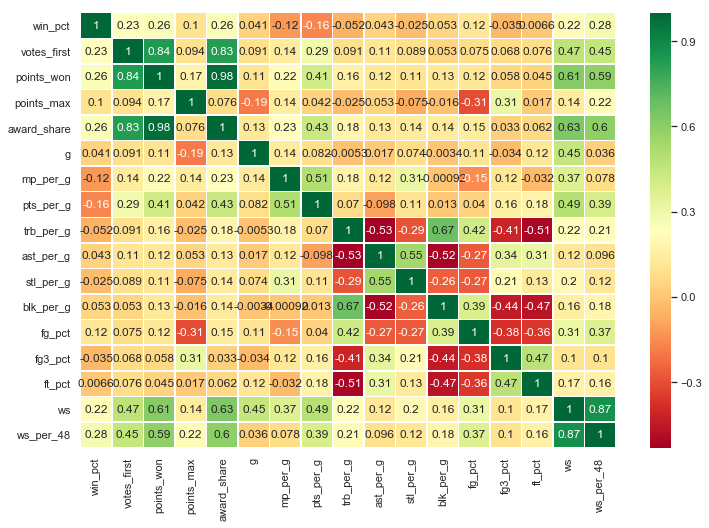

In [16]:
sns.heatmap(mvp_win_train.corr(), annot= True, cmap='RdYlGn',linewidths=.5)
plt.gcf().set_size_inches(12,8)

Segun la matriz de correlacion, la variable points_won está directamente relacionada con los ganadores del MVP

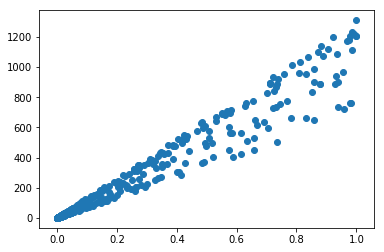

In [16]:
plt.scatter(mvp_win_train["award_share"],mvp_win_train["points_won"])
plt.ylabel = "award share"
plt.xlabel = "points won"

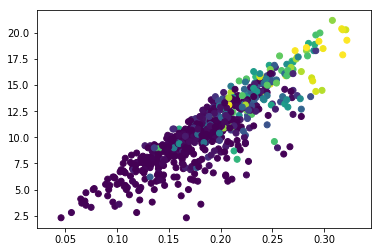

In [17]:
plt.scatter(mvp_win_train["ws_per_48"],mvp_win_train["ws"],c=mvp_win_train["award_share"]);

In [25]:
# Borramos las columnas que no necesitamos y creamos los vectores Input y Output del modelo
X = mvp_win_train.drop(['season', 'player', 'votes_first', 'points_won','points_max', 'award_share'], axis=1)
y = mvp_win_train['award_share']

In [26]:
mvp_win_train[['g', 'mp_per_g', 'pts_per_g', 'trb_per_g','ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 
                   'ft_pct','ws', 'ws_per_48']].values

array([[82.   , 35.   , 24.6  , ...,  0.787, 13.8  ,  0.231],
       [82.   , 39.5  , 21.2  , ...,  0.863, 10.8  ,  0.16 ],
       [80.   , 37.2  , 26.2  , ...,  0.766, 14.3  ,  0.23 ],
       ...,
       [73.   , 36.   , 22.9  , ...,  0.656,  6.8  ,  0.124],
       [81.   , 31.8  , 15.9  , ...,  0.636, 14.4  ,  0.268],
       [55.   , 35.2  , 27.4  , ...,  0.665,  7.2  ,  0.179]])

# Machine Learning Supervised
## Train Test Split

#### Comenzamos diviendo los datos en 2 grupos:
* Train: 90%    
* Test: 10%

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)


## Regresor

Necesitamos aplicar modelos de regresion para buscar el MVP de la NBA pues lo que esperamos encontrar al aplicar dichos  modelos es encontrar un número.

### Linear Regressor

#### Entrenamos modelo 

In [55]:
# SCIKit Learn Linear Regressor
from sklearn.linear_model import LinearRegression
# Create an instance of the model 
MVP_LIN = LinearRegression()
# Fit the regressor 
MVP_LIN.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Evaluamos el modelo

In [57]:
# Predict
y_MVP_LIN = MVP_LIN.predict(X_test)

#### Comparamos las predicciones del modelo con las variables reales

In [58]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
# Use against predictions (we must calculate the square root of the MSE)
mean_absolute_error(MVP_LIN.predict(X_test), y_test)

0.1391928616202803

In [59]:
# MAPE
np.mean(np.abs(MVP_LIN.predict(X_test)-y_test)/y_test)

25.852619932890686

In [60]:
# cross validation
from sklearn.model_selection import cross_val_score
# We calculate the metric for several subsets (determine by cv)
# With cv=5, we will have 5 results from 5 training/test
cross_val_score(MVP_LIN,X,y,cv=5,scoring="neg_mean_squared_error")

array([-0.02720632, -0.02875975, -0.03283486, -0.04585902, -0.04801395])

In [61]:
# Load the scorer
from sklearn.metrics import mean_squared_error
# Use against predictions (we must calculate the square root of the MSE)
np.sqrt(mean_squared_error(MVP_LIN.predict(X_test),y_test))

0.20063025632782416

#### Imprimimos el listado de resultado

In [62]:
df_indice = np.argsort(y_MVP_LIN)[::-1]
MVP_LIN_Result=y_MVP_LIN[df_indice]

In [63]:
# Print the results
for i in range (10):
    print(f"{i+1}.{mvp_win_train.iloc[df_indice[i]].player}: {MVP_LIN_Result[i]}")
    

1.Alex English: 0.6048440113833767
2.Moses Malone: 0.5965076125274037
3.Robert Parish: 0.5568410289884624
4.Adrian Dantley: 0.49781699468373286
5.Julius Erving: 0.40553985424084393
6.Tiny Archibald: 0.361557513333709
7.Otis Birdsong: 0.34574907942256394
8.Marques Johnson: 0.3033745553357765
9.Jamaal Wilkes: 0.29903881399665067
10.Kareem Abdul-Jabbar: 0.2763088507515048


### KNeighbors Regressor

#### Entrenamos modelo 

In [52]:
# SCIKit Learn K-Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
# Create an instance
MVP_KNB = KNeighborsRegressor(n_neighbors=2)
# Fit the data
MVP_KNB.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

#### Evaluamos el modelo

In [31]:
# Predict
y_MVP_KNB = MVP_KNB.predict(X_test)

In [44]:
y_MVP_KNB

array([0.027 , 0.885 , 0.0105, 0.218 , 0.014 , 0.0615, 0.004 , 0.0145,
       0.074 , 0.008 , 0.0035, 0.497 , 0.0275, 0.003 , 0.0135, 0.017 ,
       0.02  , 0.146 , 0.4815, 0.12  , 0.0085, 0.0895, 0.017 , 0.381 ,
       0.7005, 0.115 , 0.2735, 0.004 , 0.805 , 0.514 , 0.2505, 0.986 ,
       0.2295, 0.043 , 0.032 , 0.001 , 0.062 , 0.009 , 0.0255, 0.0955,
       0.14  , 0.0365, 0.4995, 0.369 , 0.1365, 0.084 , 0.0045, 0.0805,
       0.0455, 0.0665, 0.074 , 0.028 , 0.013 , 0.5035, 0.3015, 0.431 ,
       0.0595, 0.0105, 0.14  , 0.0235, 0.368 , 0.149 , 0.7825, 0.0375,
       0.0025])

#### Comparamos las predicciones del modelo con las variables reales

In [45]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
# Use against predictions (we must calculate the square root of the MSE)
mean_absolute_error(MVP_KNB.predict(X_test), y_test)

0.12132307692307692

In [48]:
# MAPE
np.mean(np.abs(MVP_KNB.predict(X_test)-y_test)/y_test)

5.297570823620257

In [50]:
# cross validation
from sklearn.model_selection import cross_val_score
# We calculate the metric for several subsets (determine by cv)
# With cv=5, we will have 5 results from 5 training/test
cross_val_score(MVP_KNB,X,y,cv=5,scoring="neg_mean_squared_error")

array([-0.03677278, -0.05250289, -0.04908782, -0.06381914, -0.05423253])

#### Imprimimos el listado de resultado

In [ ]:
# Load the scorer
from sklearn.metrics import mean_squared_error
# Use against predictions (we must calculate the square root of the MSE)
np.sqrt(mean_squared_error(reg.predict(X_test),y_test))

In [46]:
df_indice = np.argsort(y_MVP_KNB)[::-1]
MVP_KNB_Result=y_MVP_KNB[df_indice]

In [47]:
# Print the results
for i in range (10):
    print(f"{i+1}.{mvp_win_train.iloc[df_indice[i]].player}: {MVP_KNB_Result[i]}")
    

1.Moses Malone: 0.986
2.Larry Bird: 0.885
3.James Silas: 0.8049999999999999
4.Buck Williams: 0.7825
5.Walter Davis: 0.7004999999999999
6.Quinn Buckner: 0.514
7.Jay Vincent: 0.5035000000000001
8.Kelly Tripucka: 0.4995
9.Adrian Dantley: 0.49700000000000005
10.Truck Robinson: 0.48150000000000004


In [34]:
X_test

,win_pct,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
229,0.670732,81.0,41.1,23.4,3.8,10.0,2.0,0.2,0.461,0.338,0.766,9.2,0.132
617,0.646341,76.0,33.8,28.9,2.7,5.9,0.9,0.2,0.463,0.379,0.909,12.5,0.234
581,0.524390,73.0,35.0,21.8,10.8,2.1,0.9,1.1,0.509,0.200,0.690,7.8,0.146
276,0.573171,79.0,38.2,21.4,8.1,5.2,2.9,1.1,0.480,0.345,0.716,11.8,0.188
136,0.487805,82.0,40.0,37.1,5.2,4.6,2.9,1.5,0.482,0.182,0.857,16.9,0.247
309,0.695122,78.0,37.0,22.4,10.7,2.0,0.9,2.4,0.488,0.222,0.754,9.8,0.163
81,0.658537,67.0,38.3,17.6,7.3,13.1,2.2,0.7,0.565,0.207,0.810,10.2,0.191
257,0.695122,79.0,37.6,24.5,11.2,2.3,1.1,2.7,0.496,0.286,0.765,13.1,0.211
545,0.606061,60.0,36.4,19.8,3.6,9.1,2.5,0.1,0.478,0.371,0.861,12.7,0.278
441,0.500000,82.0,36.8,21.7,5.0,2.3,1.0,0.1,0.440,0.350,0.868,9.7,0.154


In [42]:
mvp_win_train.iloc[73]

season            1982-83
player         Larry Drew
win_pct           0.54878
votes_first             0
points_won              3
points_max            750
award_share         0.004
g                      75
mp_per_g             35.9
pts_per_g            20.1
trb_per_g             2.8
ast_per_g             8.1
stl_per_g             1.7
blk_per_g             0.1
fg_pct              0.492
fg3_pct             0.125
ft_pct               0.82
ws                    7.2
ws_per_48           0.128
Name: 73, dtype: object

0.12132307692307692

In [43]:
from sklearn.tree import DecisionTreeRegressor

# Fit decision tree regression model
MVP_DTR = DecisionTreeRegressor(max_depth=5)
MVP_DTR.fit(X_train,y_train)



DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [44]:
# Predict
y_MVP_DTR = MVP_DTR.predict(X_test)

In [45]:
df_indice = np.argsort(y_MVP_DTR)[::-1]
MVP_DTR_Result=y_MVP_DTR[df_indice]

In [47]:
# Print the results
for i in range (10):
    print(f"{i+1}.{mvp_win_train.iloc[df_indice[i]].player}: {MVP_DTR_Result[i]}")

1.Kelly Tripucka: 0.9762857142857142
2.Dan Roundfield: 0.9109999999999999
3.Otis Birdsong: 0.879
4.George Gervin: 0.7474166666666666
5.Dennis Johnson: 0.7474166666666666
6.Adrian Dantley: 0.4655
7.Moses Malone: 0.4278999999999999
8.Jack Sikma: 0.4056315789473684
9.Dennis Johnson: 0.4056315789473684
10.Norm Nixon: 0.3057931034482759


In [78]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,MVP_DTR.predict(X_test)))

0.2065532118848835